# Teori
### Oppgave 1
For å modellere fødsel og innvandring la vi til vesktarter for begge variablene, siden jo flere mennesker det er, jo flere fødes. Grunnen til at innvandring er en vekstrate er fordi hvis Aleksandria har mange folk betyr det jo at det er et trygt sted, og derfor vil flere høre om stedet, og flere vil da flykte til Aleksandria.

### Oppgave 2
Selv om Aleksandria i dag (April 2020) har en populasjon på 144000 mennesker, har vi lagt bæreevnen ganske lavt, på grunn av resurssmangel. Bæreevnen påvirker populasjonen til Aleksandria, ved at fødsel synker, og at flere drar ut for å hente ressurser (og da dør).

### Oppgave 3
Dårlig tilgang til medisiner, leger og hjelp gjør at en del dør av årsaker som ville vært forhindret i dag. Vi kan synke disse faktorene ned med tiden, hvis for eksempel medisiner og lignende blir utviktlet om igjen, men for å holde det relativt enkelt er prosentandelene konstante.

### Oppgave 4
Vi starter med 1000 zombier, som dreper en viss andel mennesker som henter ressurser, siden zombiene ikke får tilgang til byen Alexandria. De som blir drept av zombier blir ikke smittet ennå. Andel mennesker som dør kna variere, men for å holde det enkelt er det en konstant andel, vi kan si at en så stor andel som møter zombiene dør i gjennomsnitt per måned.

### Oppgave 5
Vi legger til en prosentandel for at et menneske blir smittet til en zombie, og øker zombiepopulasjonen for hver menneske som blir smittet. For samme grunn som forrige oppgave, er andelen som blir smittet konstant.

### Oppgave 6
Alexandria er lei av at zombie populasjonen øker og dreper et antall zombier med våpen. Dermed øker ikke zombie populasjonen så raskt. Andel zombier som blir drept er konstant.

### Oppgave 7
Dersom populasjonen for zombier øker for mye, vil Alexandria kalle etter forsterkninger fra Hilltop og Kingdom. Da vil drapsraten for zombiene øke, og populasjonen til zombiene synker. Menneskepopulasjonen øker ikke, siden vi kan gruppere forsterkningene med innvandrere. Dermed trenger vi ikke å øke populasjonen, siden bæreevnen ville ikke latt forsterkningene overleve uansett.

Text(0.5, 1.0, 'populasjoner under apokalypse')

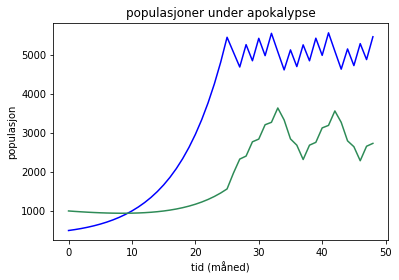

In [2]:
#Kode
from pylab import *

N = 48 #tid i måneder

#konstanter for mennesker
start_p = 500 #start populasjon i mennesker
baereevne = 5000 #max mennesker
vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
innvandrere_vekst = 0.05 #innvandrere per måned
syk = 0.01 #vekst, død av sykdom (sjekk dette)
skade = 0.05 #vekst, død av skader
alderdom = 0.01 #vekst, død av naturlig årsak
hentere = 0.1 #prosent, mennesker som henter resursser
p = start_p #populasjon

#konstater for zombier
start_z = 1000
mord = 0.5 #prosent som dør av zombier
smittet = 0.5 #prosent som blir smittet
vaapen = 0.05 #prosent zombier drept av mennesker
z_innvandrere = 0.1 #prosent zombier/smittede som innvandrer aleksandria
z = start_z

drept = 0
myrdet = 0

#arrayer
tid_array = zeros(N+1)
m_pop_array = zeros(N+1)
z_pop_array = zeros(N+1)

m_pop_array[0] = start_p
z_pop_array[0] = start_z

for i in range(1,N+1):
    p += vekstrate_f*p + p*innvandrere_vekst
    p -= (syk+skade+alderdom)*p
    myrdet = (hentere*p)*mord #antall døde som blir drept av zombier
    p -= myrdet
    z += myrdet*smittet #antall som blir smittet
    myrdet = z_innvandrere*z*mord
    p -= myrdet
    z += myrdet*smittet
    drept = z*vaapen
    z -= drept
    if z > 3500: #Hilltop og Kingdom kommer med forsterkninger
        vaapen = 0.2
    if z < 2500:
        vaapen = 0.05
    if p > baereevne:
        vekstrate_f = 0.15 #vesktrate i fødsel (prosent)
        hentere = 0.3 #prosent, mennesker som henter resursser
    if p < baereevne:
        vekstrate_f = 0.25 #vesktrate i fødsel (prosent)
        hentere = 0.1 #prosent, mennesker som henter resursser
    tid_array[i] = i
    m_pop_array[i] = p
    z_pop_array[i] = z
plot(tid_array,m_pop_array,color='blue',label="mennesker")
plot(tid_array,z_pop_array,color='seagreen',label="zombier")
xlabel('tid (måned)')
ylabel('populasjon')
title('populasjoner under apokalypse')

## Resultater
Selv om grafen har noen spisser (som ikke er deriverbare) er vi fortsatt ganske fornøyde med hvordan grafen ser ut, siden vi kan forestille oss dette i en "reell" situasjon. Som vi kan se, starter begge grafene med en eksponensiell vekst. Deretter er menneskepopulasjonen over bæreevnen, og dermed må flere ut for å hente ressurser, og det blir mindre fødseler. Da øker zombiepopulasjonen siden det er flere mennesker å smitte. Når zombiepopulasjonen blir for stor, vil menneskene i Aleksandria kalle etter forsterkninger fra Hilltop og Kingdom, og da øker drapsraten (vaapen) sånn at flere zombier dør. Forsterkninene vil da forlate byen om zombiepopulasjonen synker nok. Så gjentar alt dette seg videre.
Det at grafen har mange spisser (eller punkter som ikke er deriverbare) er litt synd, men vi mener det er verdt det for å få en grei modell av apokalypsen.